In [1]:
import tensorflow as tf
import pandas as pd
from tensorflow import keras
import numpy as np
import pickle
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [2]:
aggregate_df = pd.read_csv(f'pd_clean_data.csv')
print(aggregate_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40155 entries, 0 to 40154
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         40155 non-null  int64  
 1   datetime           40155 non-null  object 
 2   humidity           40155 non-null  float64
 3   pressure           40155 non-null  float64
 4   temperature        40155 non-null  float64
 5   wind_direction     40155 non-null  float64
 6   wind_speed         40155 non-null  float64
 7   weather_condition  40155 non-null  object 
 8   city               40155 non-null  object 
 9   country            40155 non-null  object 
 10  latitude           40155 non-null  float64
 11  longitude          40155 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 3.7+ MB
None


In [3]:
label = aggregate_df["weather_condition"]
label[:10]

0          cloudy
1    thunderstorm
2          cloudy
3          cloudy
4           rainy
5           rainy
6          cloudy
7           foggy
8           rainy
9    thunderstorm
Name: weather_condition, dtype: object

In [4]:
data = aggregate_df
data.drop(['Unnamed: 0', 'datetime', 'weather_condition'], axis='columns', inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40155 entries, 0 to 40154
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   humidity        40155 non-null  float64
 1   pressure        40155 non-null  float64
 2   temperature     40155 non-null  float64
 3   wind_direction  40155 non-null  float64
 4   wind_speed      40155 non-null  float64
 5   city            40155 non-null  object 
 6   country         40155 non-null  object 
 7   latitude        40155 non-null  float64
 8   longitude       40155 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.8+ MB


In [5]:
data[:10]

,humidity,pressure,temperature,wind_direction,wind_speed,city,country,latitude,longitude
0,88.0,1012.0,293.750000,160.0,2.0,Minneapolis,United States,44.979969,-93.26384
1,83.0,1009.0,300.010000,160.0,4.0,Minneapolis,United States,44.979969,-93.26384
2,54.0,1016.0,299.500000,350.0,5.0,Minneapolis,United States,44.979969,-93.26384
3,73.0,1012.0,292.690000,160.0,5.0,Minneapolis,United States,44.979969,-93.26384
4,61.0,1021.0,294.314497,201.0,6.0,Minneapolis,United States,44.979969,-93.26384
5,76.0,1027.0,289.947679,312.0,2.0,Minneapolis,United States,44.979969,-93.26384
6,87.0,1017.0,288.720000,278.0,2.0,Minneapolis,United States,44.979969,-93.26384
7,88.0,1018.0,291.720000,253.0,2.0,Minneapolis,United States,44.979969,-93.26384
8,82.0,1032.0,299.783667,161.0,1.0,Minneapolis,United States,44.979969,-93.26384
9,51.0,1017.0,301.070000,360.0,2.0,Minneapolis,United States,44.979969,-93.26384


In [6]:
data['city'] = data["city"].astype('category')
data['country'] = data['country'].astype('category')

In [7]:
data['city_new'] = data['city'].cat.codes
data['country_new'] = data['country'].cat.codes

In [8]:
# Create an instance of One-hot-encoder
enc = OneHotEncoder()

# Passing encoded columns

enc_data = pd.DataFrame(enc.fit_transform(
    data[['city_new', 'country_new']]).toarray())

In [9]:
# Merge with main
new_data = data.join(enc_data)

In [10]:
new_data.drop(['city', 'country', 'city_new', 'country_new'], axis='columns', inplace=True)

In [11]:
new_data[:10]

,humidity,pressure,temperature,wind_direction,wind_speed,latitude,longitude,0,1,2,...,21,22,23,24,25,26,27,28,29,30
0,88.0,1012.0,293.750000,160.0,2.0,44.979969,-93.26384,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,83.0,1009.0,300.010000,160.0,4.0,44.979969,-93.26384,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,54.0,1016.0,299.500000,350.0,5.0,44.979969,-93.26384,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,73.0,1012.0,292.690000,160.0,5.0,44.979969,-93.26384,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,61.0,1021.0,294.314497,201.0,6.0,44.979969,-93.26384,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,76.0,1027.0,289.947679,312.0,2.0,44.979969,-93.26384,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,87.0,1017.0,288.720000,278.0,2.0,44.979969,-93.26384,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,88.0,1018.0,291.720000,253.0,2.0,44.979969,-93.26384,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,82.0,1032.0,299.783667,161.0,1.0,44.979969,-93.26384,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,51.0,1017.0,301.070000,360.0,2.0,44.979969,-93.26384,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [12]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40155 entries, 0 to 40154
Data columns (total 38 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   humidity        40155 non-null  float64
 1   pressure        40155 non-null  float64
 2   temperature     40155 non-null  float64
 3   wind_direction  40155 non-null  float64
 4   wind_speed      40155 non-null  float64
 5   latitude        40155 non-null  float64
 6   longitude       40155 non-null  float64
 7   0               40155 non-null  float64
 8   1               40155 non-null  float64
 9   2               40155 non-null  float64
 10  3               40155 non-null  float64
 11  4               40155 non-null  float64
 12  5               40155 non-null  float64
 13  6               40155 non-null  float64
 14  7               40155 non-null  float64
 15  8               40155 non-null  float64
 16  9               40155 non-null  float64
 17  10              40155 non-null 

In [13]:
new_data.columns = new_data.columns.astype(str)

In [14]:
le = LabelEncoder()
le.fit(list(label))

list(le.classes_)

['cloudy', 'foggy', 'rainy', 'snowy', 'sunny', 'thunderstorm']

In [15]:
encoded_label = le.transform(label)

In [16]:
label_df = pd.DataFrame({'label': encoded_label})

label_df

,label
0,0
1,5
2,0
3,0
4,2
...,...
40150,1
40151,1
40152,1
40153,0


In [27]:
X_train, X_test, y_train, y_test = train_test_split(new_data, label_df, test_size=0.2, random_state=42)

In [28]:
len(X_train.columns)

38

In [29]:
X_train

,humidity,pressure,temperature,wind_direction,wind_speed,latitude,longitude,0,1,2,...,21,22,23,24,25,26,27,28,29,30
30882,93.0,1008.0,290.970,311.0,2.0,35.227089,-80.843132,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
19151,77.0,1016.0,293.330,240.0,1.0,32.715328,-117.157257,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
19147,72.0,1012.0,290.850,170.0,3.0,32.715328,-117.157257,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
6943,85.0,1002.0,268.620,290.0,6.0,44.979969,-93.263840,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
31695,38.0,1036.0,287.662,337.0,2.0,39.099731,-94.578568,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,88.0,1017.0,298.390,290.0,2.0,25.774269,-80.193657,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11284,92.0,1020.0,280.974,219.0,3.0,49.249660,-123.119339,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
38158,37.0,1013.0,300.780,330.0,5.0,39.099731,-94.578568,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
860,66.0,1014.0,263.650,330.0,8.0,44.979969,-93.263840,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [30]:
from sklearn import svm

clf = svm.SVC(decision_function_shape='ovr')
clf.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [31]:
y_pred = clf.predict(X_test)

In [32]:
y_pred

array([3, 5, 5, ..., 3, 5, 1])

In [33]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)

acc

0.46880836757564437

In [34]:
from sklearn.model_selection import cross_val_score

In [40]:
cross_val_score(clf, X_test, y_test, cv=5, scoring= 'average_precision')

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A colum

array([nan, nan, nan, nan, nan])

In [43]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


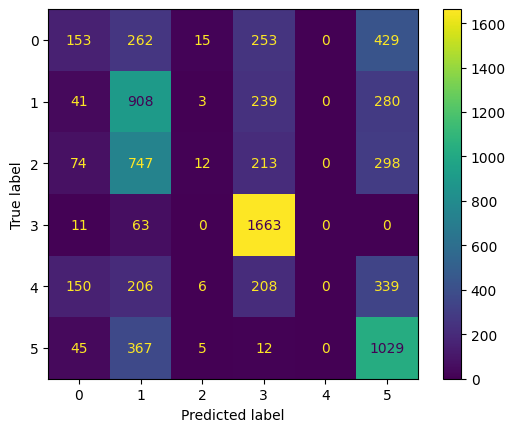

In [44]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

plt.show()


In [36]:
from sklearn.neighbors import KNeighborsClassifier

In [84]:
neigh = KNeighborsClassifier(n_neighbors=18)

neigh.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=18)

In [85]:
from sklearn.metrics import accuracy_score

n_y_pred = neigh.predict(X_test)

n_acc = accuracy_score(y_test, n_y_pred)
n_acc

0.5333084298343918

In [86]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

precision = precision_score(y_test, n_y_pred, average='macro')
recall = recall_score(y_test, n_y_pred, average='macro')
f1_score = 2 * precision * recall / (precision + recall)
accuracy = accuracy_score(y_test, n_y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1_score}')

Accuracy: 0.5333084298343918
Precision: 0.48442858626857427
Recall: 0.4828716527772194
F1-score: 0.48364886652935946


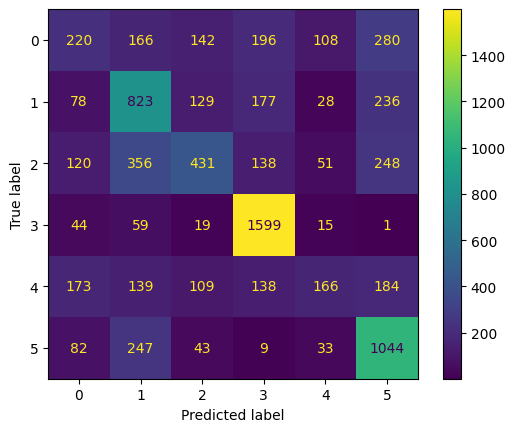

In [87]:
cm = confusion_matrix(y_test, n_y_pred, labels=neigh.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=neigh.classes_)
disp.plot()

plt.show()


In [39]:
cross_val_score(neigh, X_test, y_test, cv=5 scoring= 'average_precision')

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 367, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: 

array([nan, nan, nan, nan, nan])